In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
print('total train dataset', mnist.train.images.shape[0])
print('total test dataset', mnist.test.images.shape[0])
print('dimension of picture', mnist.train.images.shape[1])
print('total unique classes', np.unique(np.argmax(mnist.train.labels,axis=1)))

total train dataset 55000
total test dataset 10000
dimension of picture 784
total unique classes [0 1 2 3 4 5 6 7 8 9]


In [0]:
class Feed_Forward:
  def __init__(self, input_size, output_size, size_layer, learning_rate):
    self.X = tf.placeholder(tf.float32, (None, input_size))
    self.Y = tf.placeholder(tf.float32, (None, output_size))
    w1 = tf.Variable(tf.random_normal([input_size, size_layer]))
    b1 = tf.Variable(tf.random_normal([size_layer]))
    w2 = tf.Variable(tf.random_normal([size_layer, size_layer]))
    b2 = tf.Variable(tf.random_normal([size_layer]))
    w3 = tf.Variable(tf.random_normal([size_layer, output_size]))
    b3 = tf.Variable(tf.random_normal([output_size]))
    feed = tf.nn.relu(tf.matmul(self.X, w1) + b1)
    feed = tf.nn.relu(tf.matmul(feed, w2) + b2)
    self.logits = tf.matmul(feed, w3) + b3
    self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.Y, logits=self.logits))
    self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(self.cost)

In [0]:
SIZE = 256
EPOCH = 10
BATCH_SIZE = 128
LEARNING_RATE = 0.001

In [5]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
model = Feed_Forward(mnist.train.images.shape[1], np.unique(np.argmax(mnist.train.labels,axis=1)).shape[0], SIZE, LEARNING_RATE)
sess.run(tf.global_variables_initializer())

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [6]:
LOSS, ACCURACY, ACCURACY_TEST = [], [], []
for i in range(EPOCH):
  total_loss, total_acc = 0, 0
  for k in range(0, (mnist.train.images.shape[0] // BATCH_SIZE) * BATCH_SIZE, BATCH_SIZE):
    batch_x = mnist.train.images[k:k+BATCH_SIZE, :]
    batch_y = mnist.train.labels[k:k+BATCH_SIZE, :]
    logits, loss, _ = sess.run([model.logits, model.cost, model.optimizer], feed_dict={model.X:batch_x, model.Y:batch_y})
    acc = np.mean(np.argmax(logits,axis=1)==np.argmax(batch_y,axis=1))
    total_loss += loss
    total_acc += acc
  total_loss /= (mnist.train.images.shape[0] // BATCH_SIZE)
  total_acc /= (mnist.train.images.shape[0] // BATCH_SIZE)
  LOSS.append(total_loss)
  ACCURACY.append(total_acc)
  total_acc = 0
  for k in range(0, (mnist.test.images.shape[0] // BATCH_SIZE) * BATCH_SIZE, BATCH_SIZE):
    batch_x = mnist.test.images[k:k+BATCH_SIZE, :]
    batch_y = mnist.test.labels[k:k+BATCH_SIZE, :]
    logits = sess.run(model.logits, feed_dict={model.X:batch_x})
    acc = np.mean(np.argmax(logits,axis=1)==np.argmax(batch_y,axis=1))
    total_acc += acc
  total_acc /= (mnist.test.images.shape[0] // BATCH_SIZE)
  ACCURACY_TEST.append(total_acc)
  print('epoch %d, loss %f, training accuracy %f, testing accuracy %f'%(i+1, LOSS[-1], ACCURACY[-1], ACCURACY_TEST[-1]))

epoch 1, loss 173.025740, training accuracy 0.703580, testing accuracy 0.857572
epoch 2, loss 44.955252, training accuracy 0.869282, testing accuracy 0.895433
epoch 3, loss 29.083373, training accuracy 0.902043, testing accuracy 0.909155
epoch 4, loss 20.912671, training accuracy 0.920728, testing accuracy 0.918970
epoch 5, loss 15.621223, training accuracy 0.934331, testing accuracy 0.923878
epoch 6, loss 12.023009, training accuracy 0.942180, testing accuracy 0.928085
epoch 7, loss 9.130637, training accuracy 0.951613, testing accuracy 0.931691
epoch 8, loss 7.082756, training accuracy 0.957805, testing accuracy 0.933494
epoch 9, loss 5.457302, training accuracy 0.964379, testing accuracy 0.935797
epoch 10, loss 4.298011, training accuracy 0.968422, testing accuracy 0.934295


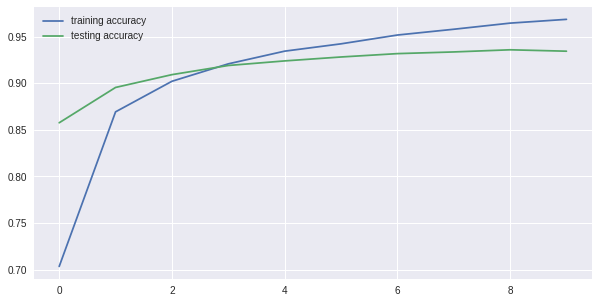

In [7]:
plt.figure(figsize=(10,5))
plt.plot(ACCURACY, label='training accuracy')
plt.plot(ACCURACY_TEST, label='testing accuracy')
plt.legend()
plt.show()